<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
    
    Pablo Muñoz
    
    #############.

**Fecha:** 07 de junio del 2021.

**Expediente** : 
    
    if719963
    XXX.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/munoz97/Tarea2.Pablo.Tona

# Tarea 2: Clase 4

## Enunciado de tarea 
1. Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
![imagen.png](attachment:imagen.png)
Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. El producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando unicamente las funciones **lambda y map**.

`orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]`

In [14]:
# Librerias
import numpy as np
import pandas as pd
import warnings
from functools import reduce
warnings.filterwarnings('ignore')

## Ejercicio 1: Código Estudiante 1

### Pablo Muñoz

In [1]:
# Código de solución estudiante 1
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]
l = list(map(lambda x: [x[0],x[2]*x[3]] if x[2]*x[3] >= 100 else (x[0], x[2]*x[3]+10),orders))
l


[['34587', 163.8],
 ['98762', 284.0],
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

In [2]:
orders = pd.DataFrame(data= (["34587", "Learning Python, Mark Lutz", 4, 40.95],
                              ["98762", "Programming Python, Mark Lutz", 5, 56.80],
                              ["77226", "Head First Python, Paul Barry", 3,32.95],
                              ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]),
                       columns=['Order_Number', 'Book Title and Author', 'Quantity', 'Price_per_Item'])                
orders
multi = lambda a,b: a*b  
b = multi(orders['Price_per_Item'],orders['Quantity'])
a = list(map(lambda x: x  if (x)>=100 else (x)+10,b))
result = pd.DataFrame(data = a, columns =['Result'])
result['Order_Number']=orders['Order_Number']
result= result[['Order_Number','Result']]
result

,Order_Number,Result
0,34587,163.80
1,98762,284.00
2,77226,108.85
3,88112,84.97


2. La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de pedido, cantidad total de pedido). Utilice la función `Reduce`. Recuerde el precio del pedido del producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €.

3. Resolver los anteriores ejercicios usando pandas (DataFrame)

In [4]:

orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]
n = lambda a,b: a+b
p = lambda x: x if x>=100 else x+10
result = list(map(lambda x: [x[0]] + list(map(lambda y: p(y[1]*y[2]),x[1:])),orders))
result = list(map(lambda x: (x[0], reduce(n,x[1:])),result))
result

[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]

In [5]:
orders1 = pd.DataFrame(data= ([1, "5464", 4, 9.99, "8274",18,12.99, "9744", 9, 44.95],
                              [2, "5464", 9, 9.99, "9744", 9, 44.95],
                              [3, "5464", 9, 9.99, "88112", 11, 24.99],
                              [4, "8732", 7, 11.99, "7733",11,18.99, "88112", 5, 39.95]))
                                       
orders1=orders1.fillna(0)
a = ((orders1[2]*orders1[3]) + (orders1[5]*orders1[6]) + (orders1[8]*orders1[9])).apply(lambda x: x if x>=100 else x+10)
result =pd.DataFrame(a,columns=['Result'])
result['O']=orders1[0]
result= result[['O','Result']]
result

,O,Result
0,1,678.33
1,2,494.46
2,3,364.80
3,4,492.57


4. Use filter to eliminate all words that are shorter than 4 letters from a list of words
`list='the notion of a lambda function goes all the way back to the origin of computer science'`

In [6]:
lista = 'the notion of a lambda function goes all the way back to the origin of computer science'
l = lista.split()
sol = list(filter(lambda x: len(x)>=4,l)) 
sol

['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']

5. Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80

In [7]:

np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
print(temperatures)

temperature=list(filter(lambda x: x>=32 and x<=80,temperatures))
porc= len(temperature)/len(temperatures)
porc

[ 35.97387961  99.13294268  92.6178302   99.69549478  63.21119535
  73.90387697  95.50028838  99.21476553  36.98251238 101.45813729
 100.5917418   89.38159435  89.52156589  83.8084752   28.37990868
  68.75395211  45.86132067  36.58307493  56.32208365  33.96219302
  45.29071318  74.86289938  66.51091383  88.19316186  94.26635864
  46.83131624 109.60744472 109.68427993  44.55796499  92.84146259]


0.4666666666666667

6. Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations
> **Hint**: Explore the command `np.minimum.reduce` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)

In [8]:
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])
# point_xy

# Función
x = np.minimum.reduce(point_xy)
#Compresion de lista y reduce
f = reduce(lambda a,b: a if (a < b) else b,[point_xy[i][0] for i in range(len(point_xy))])
a = reduce(lambda a,b: a if (a < b) else b,[point_xy[i][1] for i in range(len(point_xy))])
y = np.array([f,a])
x, y

(array([0, 2]), array([0, 2]))

________________________________

# Código de solución estudiante 2 -JTNavarro

### Ejercicio 1

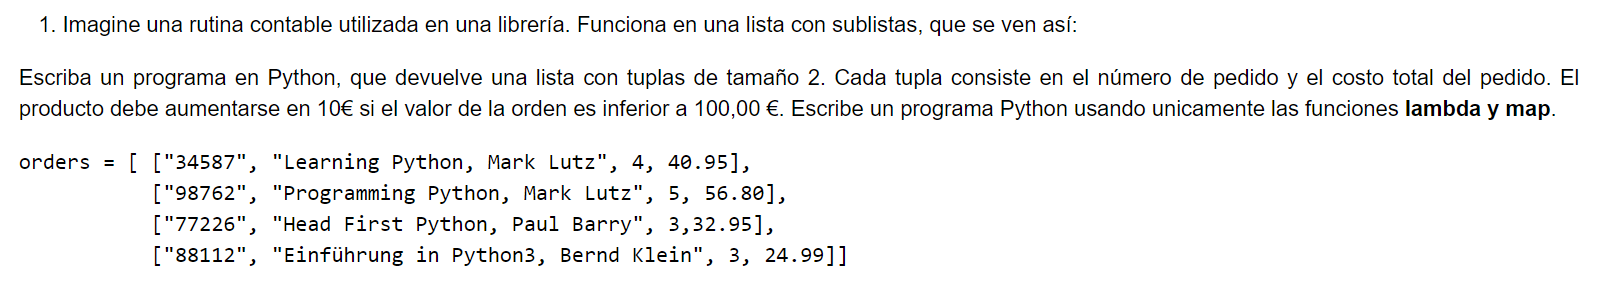

In [4]:
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

# 1- Creamos una función para realizar el aumento a los pedidos menores de 100
    
# Crear funcion condicional
condicional = lambda x,y: (x*y)+10 if x*y <100 else x*y

# 2- Utilziamos map y lambda para iterar y construir las tuplas.

result = list(map(lambda i: (i[0], condicional(i[2],i[3])), orders  ))
result

[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

### Ejercicio 2

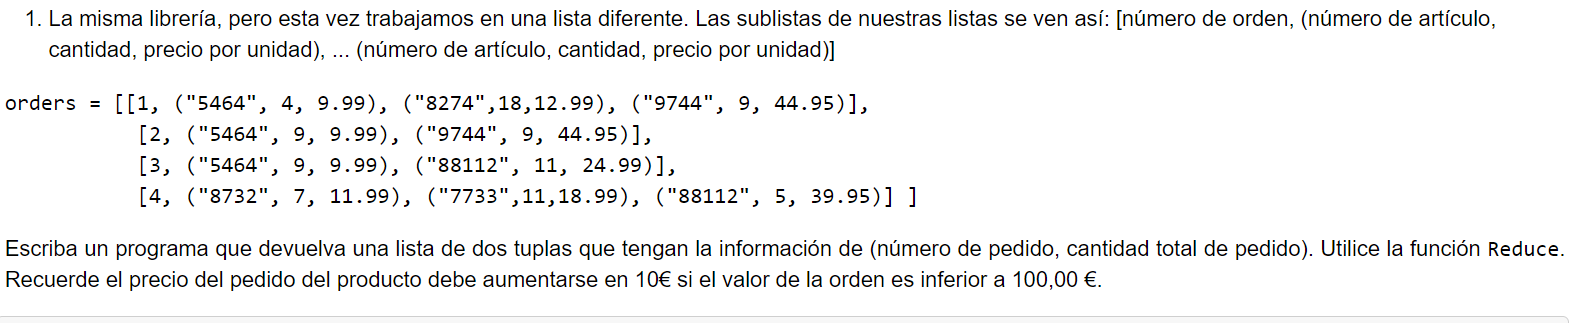

In [5]:

orders1 = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]

from functools import reduce

# Crear función de suma para reduce
suma = lambda x,y: x+y

# Crear variable para almacenar el índice
indice = list(map(lambda x: x[0],orders1))

#Crear variable para almacenar las tuplas
tuplas = list(map(lambda x: x[1:], orders1))

#Crear variable para realizar la multiplicacion de los ultimos 2 elementos de la tupla
resultado = list(map(lambda y: reduce(suma, list(map(lambda x: condicional(x[1],x[2]), y))) ,tuplas ))

# Juntar el índice con las operaciones de las tuplas
final = list(zip(indice,resultado))
final

[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]

### Ejercicio 3.1

Resolver los ejercicios anteriores utilizando pandas (DataFrame)

In [6]:
import pandas as pd
import numpy as np
from functools import reduce

orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

# Lo volvemos dataframe
df = pd.DataFrame(orders)

# Eliminamos la columna con los nombres
df = df.drop(columns=[1])

# Realizamos la operacion entre la columna 2 y 3
df['total'] = pd.DataFrame(map(condicional, df[2],df[3] ))

# Nombramos las columnas
df.columns = ['Pedido','a','b','Total']

# Eliminamos las columnas que no nos interesan
df.drop(columns=['a','b'])


,Pedido,Total
0,34587,163.80
1,98762,284.00
2,77226,108.85
3,88112,84.97


### Ejercicio 3.2

In [15]:
orders1 = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]


df = pd.DataFrame(orders1)
# Reemplazar valores nulos por ceros
df = df.replace(np.nan,0)

# Realizamos las operaciones con las columnas 2 y 3
r1 = pd.DataFrame(map(lambda x: condicional(x[1],x[2]), df[1]))
r2 = pd.DataFrame(map(lambda x: condicional(x[1],x[2]), df[2]))

# Realizamos las operaciones con la columna 4 (de manera diferente debido a que contiene 0's)
r3_1 = condicional(df[3][0][1],df[3][0][2])
r3_2 = condicional(df[3][3][1],df[3][3][2])
 
# organizamos nuestro data frame con los resultados
new = pd.DataFrame(r1)
new[1] = r2
new[2] = 0
new[2][0] = r3_1
new[2][3] = r3_2

# Hacemos la suma de los pedidos y eliminamos la columna que no necesitamos
new[1] = new.sum(axis=1)
new = new.drop(columns=[2])
new[0] = df.iloc[:,0]
new.columns = ['Pedido','Total']
print(new)

   Pedido   Total
0       1  687.78
1       2  504.46
2       3  374.80
3       4  501.82


### Ejercicio 4
#### Use filter to eliminate all words that are shorter than 4 letters from a list of words list='the notion of a lambda function goes all the way back to the origin of computer science'

In [9]:
l='the notion of a lambda function goes all the way back to the origin of computer science'
cond = lambda x: x if len(x)>=4 else None
l2 = pd.DataFrame(filter(cond,l.split()))
l2.columns=['+4 letras']
l2

,+4 letras
0,notion
1,lambda
2,function
3,goes
4,back
5,origin
6,computer
7,science


### Ejercicio 5
#### Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80

In [10]:

np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
type(temperatures)

prueba = lambda x: x if 32<x<80 else None
n = pd.DataFrame(filter(prueba, temperatures))
result = (len(n)/len(temperatures))*100
print(result,'%')
n

46.666666666666664 %


,0
0,35.973880
1,63.211195
2,73.903877
3,36.982512
4,68.753952
5,45.861321
6,36.583075
7,56.322084
8,33.962193
9,45.290713


### Ejercicio 6
#### Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations

In [11]:
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])

menor = np.minimum.reduce

minimo = (reduce(lambda x,y : menor([x,y]), point_xy))
minimo

array([0, 2])